In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as pg
import MetaTrader5 as mt5
import datetime as dt

# Data

In [2]:
import json

from modules.interfaces import User,DataBase
from modules.managers import PretradeDataManager,OrderManager,PortfolioManager
from modules.portfolio import *

In [3]:
def read_json(filename):
  with open(filename) as f:
    j = json.load(f)
  return j

ac_info = read_json('config/mt5_account.json')['ftmo-demo']
pre_db_info = read_json('config/postgres_info.json')['pre-trade']
post_db_info = read_json('config/postgres_info.json')['post-trade']
params = read_json('config/parameters.json')
asset_allocation = read_json('config/asset_allocation.json')

In [4]:
user = User().login_by_dict(ac_info)
pre_db = DataBase().connect_by_dict(pre_db_info)
post_db = DataBase().connect_by_dict(post_db_info)

Logged in as 1520198341 (FTMO-Demo2)
Connected to pre-trade (localhost:5432)
Connected to post-trade (localhost:5432)


In [5]:
pdm = PretradeDataManager(user,pre_db)
om = OrderManager(user,post_db)
pm = PortfolioManager(om,pdm,asset_allocation,params)

In [6]:
pm.init_assets()
pdm.set_universe()

In [7]:
pdm.update_bars()
pm.update_assets_attr()
pm.update_capital(100000)
pm.allocate_capital()

[GER40.cash]    EQUITY
Getting 1h bars of GER40.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:03.348801+00:00
No new bars

[UK100.cash]    EQUITY
Getting 1h bars of UK100.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:03.615801+00:00
No new bars

[US100.cash]    EQUITY
Getting 1h bars of US100.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:03.871801+00:00
No new bars

[US30.cash]     EQUITY
Getting 1h bars of US30.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:04.131789+00:00
No new bars

[US500.cash]    EQUITY
Getting 1h bars of US500.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:04.397789+00:00
No new bars

[AUS200.cash]   EQUITY
Getting 1h bars of AUS200.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:04.657789+00:00
No new bars

[EU50.cash]     EQUITY
Getting 1h bars of EU50.cash from 2024-05-14 14:00:00+00:00 to 2024-05-14 14:17:04.917789+00:00
No new bars

[FRA40.cash]    EQUITY
Getting 1h bars of FRA40.cash from 2024-05-14 1

In [11]:
s = 0
l = list()
for symbol in pm.assets.keys():
    cap = round(pm.assets[symbol].capital)
    inv = round(1 / pm.assets[symbol].vol)
    l.append((symbol, cap, inv))
    s += inv
for symbol, cap, inv in l:
    print(symbol, cap, inv, str(round(10000 * inv / s)/100) + "%")

AUDUSD 4882 131 4.89%
AUDNZD 9753 261 9.74%
AUDCAD 6814 183 6.83%
AUDCHF 5865 157 5.86%
NZDUSD 4815 129 4.82%
NZDCAD 6342 170 6.35%
EURUSD 7398 198 7.39%
EURAUD 6859 184 6.87%
EURCAD 8442 226 8.44%
EURCHF 9190 246 9.18%
GBPNZD 6503 174 6.49%
GBPAUD 6788 182 6.79%
GBPCAD 7752 208 7.76%
USDCAD 8597 230 8.59%


In [12]:
pm.send_order()

[AUDUSD]
Open position
    side: +1, n_lots: 0.074, tp: 0.66617, sl: 0.64596, ticket: -
    comment: M00001
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.66114, bid: 0.66111, ask: 0.66114
    comment: Request executed
[AUDNZD]
Open position
    side: +1, n_lots: 0.148, tp: 1.10217, sl: 1.08536, ticket: -
    comment: M00001
Error status: Success(1)
Order status: Request executed(10009)
    price: 1.09824, bid: 1.09821, ask: 1.09824
    comment: Request executed
[AUDCAD]
Open position
    side: +1, n_lots: 0.103, tp: 0.90852, sl: 0.88872, ticket: -
    comment: M00001
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.90344, bid: 0.90338, ask: 0.90344
    comment: Request executed
[AUDCHF]
Open position
    side: +1, n_lots: 0.089, tp: 0.60382, sl: 0.58855, ticket: -
    comment: M00001
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.60015, bid: 0.60009, ask: 0.60015
    comment: Request executed
[NZDUSD]

In [13]:
pm.close_all()

17182053 -1 0.07 999999
    side: -1, n_lots: 0.070, tp: -, sl: -, ticket: 17182053
    comment: 999999
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.66106, bid: 0.66106, ask: 0.6611
    comment: Request executed
17182054 -1 0.15 999999
    side: -1, n_lots: 0.150, tp: -, sl: -, ticket: 17182054
    comment: 999999
Error status: Success(1)
Order status: Request executed(10009)
    price: 1.09813, bid: 1.09813, ask: 1.09823
    comment: Request executed
17182055 -1 0.1 999999
    side: -1, n_lots: 0.100, tp: -, sl: -, ticket: 17182055
    comment: 999999
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.90337, bid: 0.90337, ask: 0.90345
    comment: Request executed
17182057 -1 0.09 999999
    side: -1, n_lots: 0.090, tp: -, sl: -, ticket: 17182057
    comment: 999999
Error status: Success(1)
Order status: Request executed(10009)
    price: 0.60007, bid: 0.60007, ask: 0.60014
    comment: Request executed
17182059 -1 0.08 999999
  

In [19]:
om.book.get_book()

ticket                time  type  magic  identifier  reason  volume  \
0  17136376 2024-05-14 11:15:52     0      0    17136376       3    0.02   

   price_open       sl       tp  price_current  swap  profit  symbol  \
0     0.66027  0.64671  0.66752         0.6604   0.0    0.26  AUDUSD   

            comment external_id  
0  M0001-filtered_b

In [10]:
om.close_all_market(symbol)

16760753 -1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760865 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760872 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760874 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760894 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760920 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760940 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)
16760943 1 0.01 999999 - Close all
Error status: Success(1)
Order status: Request executed(10009)


retcode      deal volume     price       bid       ask           comment  \
0   10009  16287414   0.01  60799.84  60799.84  60824.26  Request executed   
1   10009  16287415   0.01  60824.26  60799.84  60824.26  Request executed   
2   10009  16287416   0.01  60824.26  60799.84  60824.26  Request executed   
3   10009  16287417   0.01  60824.26  60799.84  60824.26  Request executed   
4   10009  16287418   0.01  60824.26  60799.84  60824.26  Request executed   
5   10009  16287419   0.01  60822.55  60798.04  60822.55  Request executed   
6   10009  16287420   0.01  60822.82  60798.14  60822.82  Request executed   
7   10009  16287421   0.01   60825.1  60800.14   60825.1  Request executed   

  request_id retcode_external  
0  134510261                0  
1  134510262                0  
2  134510263                0  
3  134510264                0  
4  134510265                0  
5  134510266                0  
6  134510267                0  
7  134510268                0

In [ ]:
pdm.close()

In [ ]:
df = pd.DataFrame()
df["symbol"] = ["AUDUSD", "EURUSD", "GBPUSD", "NZDUSD", "USDCHF", "USDCAD", "USDJPY"]
df["description"] = [
    "Australian Dollar (in US Dollar)",
    "Euro (in US Dollar)",
    "UK Pound (in US Dollar)",
    "New Zealand Dollar (in US Dollar)",
    "US Dollar (in Swiss Franc)",
    "US dollar (in Canadian Dollar)",
    "US dollar (in Japanese Yen)",
]
df["asset_class"] = "currency"
df["nominal_currency"] = ["USD", "USD", "USD", "USD", "CHF", "CAD", "JPY"]
df["id"] = range(len(df))
df = df[["id", "symbol", "asset_class", "nominal_currency", "description"]]
df

id  symbol asset_class nominal_currency                        description
0   0  AUDUSD    currency              USD   Australian Dollar (in US Dollar)
1   1  EURUSD    currency              USD                Euro (in US Dollar)
2   2  GBPUSD    currency              USD            UK Pound (in US Dollar)
3   3  NZDUSD    currency              USD  New Zealand Dollar (in US Dollar)
4   4  USDCHF    currency              CHF         US Dollar (in Swiss Franc)
5   5  USDCAD    currency              CAD     US dollar (in Canadian Dollar)
6   6  USDJPY    currency              JPY        US dollar (in Japanese Yen)

# Models

In [ ]:
signal = []
train_size = 12000
start = 1000
for i in range(0+start,24+start):
  train_set = data.iloc[i:train_size+i]
  
  model = ShortTermBollingerBand(train_set.Open,
                         train_set.High,
                         train_set.Low,
                         train_set.Close,
                         train_set.Volume)
  signal.append(model.signal)

<Axes: xlabel='Datetime'>

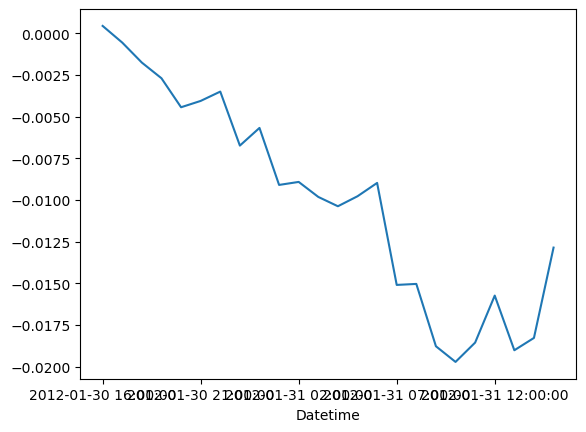

In [ ]:
pos = pd.Series(signal,index=data.index[train_size+start:train_size+start+24])
logret = data.Close.diff().shift(-1)
pnl = pos*logret
pnl.dropna().cumsum().plot()


# Rules

In [ ]:
def store_rule(rule_obj:TradingRule,signals,bisignals,pnls):
  signals.append(rule_obj.signal)
  bisignals.append(rule_obj.bisignal)
  pnls.append(rule_obj.pnl)

In [ ]:
s = data.close.iloc[0]
sigma = data.close.std()
t = len(data)

In [ ]:
def get_rand_data(s,sigma,t):
  rand_r = np.random.standard_normal(size=t) * sigma
  rand_r[0] = 1
  rand_s = pd.Series(rand_r.cumsum() * s,index=data.index)
  
  rand_data = pd.DataFrame()
  rand_data['open'] = rand_s
  rand_data['high'] = rand_s
  rand_data['low'] = rand_s
  rand_data['close'] = rand_s
  rand_data['volume'] = 0
  
  return rand_data

In [ ]:
def get_rand_signal(data):
  from itertools import product
  signals = []
  bisignals = []
  pnls = []

  lookbacks = [12*2**i for i in range(6)]

  for lookback in lookbacks:
    for thr in [0.85,0.95,0.99]:
      store_rule(ChannelBreakout(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(SkewPremium(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(KurtReversal(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
    for thr in [1,2,3]:
      store_rule(EWMAC(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(BollingerBand(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(NDayMomentum(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      
  signals_df = pd.concat(signals,axis=1).dropna()
  bisignals_df = pd.concat(bisignals,axis=1).dropna()
  pnls_df = pd.concat(pnls,axis=1).dropna()
  
  return signals_df,bisignals_df,pnls_df

In [ ]:
from itertools import product
signals = []
bisignals = []
pnls = []

lookbacks = [12*2**i for i in range(6)]

data = data.ffill()

for lookback in lookbacks:
  for thr in [0.85,0.95,0.99]:
    store_rule(ChannelBreakout(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(SkewPremium(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(KurtReversal(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
  for thr in [1,2,3]:
    store_rule(EWMAC(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(BollingerBand(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(NDayMomentum(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
  
signals_df = pd.concat(signals,axis=1).dropna()
bisignals_df = pd.concat(bisignals,axis=1).dropna()
pnls_df = pd.concat(pnls,axis=1).dropna()

In [ ]:
def sr(pnl):
  pnl = pnl.fillna(0)
  mu = pnl.mean()
  sig = pnl.std()
  n_per_year = 24*252
  sr = mu/sig*n_per_year**0.5
  return sr

In [ ]:
strats = ['EWMAC','ChannelBreakout','NDayMomentum','BollingerBand','SkewPremium','KurtReversal']

fig,axes = plt.subplots(2,3,figsize=(30,16))
for i,strat in enumerate(strats):
  cols = pnls_df.columns[pnls_df.columns.str.match(f'{strat}_*')]
  ax = axes[i//3,i%3]
  pnls_df.loc[:,cols].cumsum().plot(ax=ax)

# KMean

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
rand_data = get_rand_data(s,sigma,t)
signals_df,bisignals_df,pnls_df = get_rand_signal(rand_data)

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def get_port(bisignals_df):
  n_clusters = 12
  kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
  kmeans.fit(bisignals_df.corr())
  groups = kmeans.labels_

  port = {i: list() for i in range(n_clusters)}
  for i,group in enumerate(groups):
    port[group].append(pnls_df.columns[i])
  return port

In [ ]:
rand_port = get_port(bisignals_df)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
kmeans.fit(pnls_df.corr())
groups = kmeans.labels_

port = {i: list() for i in range(n_clusters)}
for i,group in enumerate(groups):
  port[group].append(pnls_df.columns[i])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
fig,axes = plt.subplots(4,3,figsize=(30,32))
for i,s_list in (port.items()):
  ax = axes[i//3,i%3]
  pnls_df.loc[:,s_list].cumsum().plot(ax=ax)

In [ ]:
import pickle


def save_pickle(obj, filename):
    with open(f"{filename}.pickle", "wb") as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
def load_pickle(filename):
    with open(f"{filename}.pickle", "rb") as handle:
        obj = pickle.load(handle)
        return obj

In [ ]:
save_pickle(port,'strat_cluster')

In [ ]:
port = load_pickle('strat_cluster')

# Labelling

In [ ]:
def get_label(prc, vol, tp, sl, hd):
    log_prc = np.log(prc)
    log_ret = log_prc.diff().shift(-1)

    # tp = window**0.5
    # sl = window**0.5
    # hd = window

    # print(tp , sl , hd)
    label = []

    for i, ret in log_ret.items():
        up_bar = vol.loc[i] * tp
        low_bar = vol.loc[i] * -sl
        time_bar = hd

        future_ret = log_ret.loc[i:]
        cum_ret = ret
        cum_day = 1
        while True:
            if cum_ret >= up_bar:
                label.append(+2)
                break
            elif cum_ret <= low_bar:
                label.append(np.sign(cum_ret))
                break
            elif cum_day >= time_bar or cum_day >= future_ret.shape[0]:
                label.append(-2)
                break

            ret = future_ret.iloc[cum_day]
            cum_day += 1
            cum_ret += ret

    label = pd.Series(label, index=log_ret.index, name="LABEL")
    return label

In [ ]:
tp,sl,hd = 5,5,24
label = get_label(data.close,technicals.avghv_96,tp,sl,hd)

In [ ]:
label.value_counts()

-2.0    40935
-1.0    14244
 2.0    12791
Name: LABEL, dtype: int64

In [ ]:
features = technicals.drop(columns=['id','symbol'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from statsmodels.api import OLS

from numpy.lib.stride_tricks import sliding_window_view

In [ ]:
def get_pred(dataset):
    # dataset = dataset[0,0]
    # print(dataset)
    train_set = dataset[:, : -1 - 24]
    test_set = dataset[:, -1]
    train_y, train_x = train_set[0], train_set[1:]
    test_y, test_x = test_set[0], test_set[1:]
    # model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=300300)
    # model = GaussianNB()
    model = LogisticRegression(penalty="l2", random_state=300300)
    model.fit(y=train_y, X=train_x.T)
    pred = model.predict(test_x.reshape(1, -1))[0]
    return pred

In [ ]:
p = pd.concat([label,features],axis=1).dropna()
lookback = 9600

# create rolling datasets for each day
rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
# random forest prediction
#pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
size = 24*250
ind = np.random.choice(np.arange(len(rolling)),replace=False,size=size)
l = list()
for i in range(25):
  ii = ind[24*20*i:24*20*(i+1)]
  pred = [get_pred(dataset) for dataset in rolling[ii]]
  pred_i = pd.Series(pred,p.index[lookback:][ii])
  l.append(pred_i)
  del pred,pred_i
  
pred_d = pd.concat(l)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
def sr(pnl):
  pnl = pnl.fillna(0)
  mu = pnl.mean()
  sig = pnl.std()
  n_per_year = 252
  sr = mu/sig*n_per_year**0.5
  return sr

In [ ]:
pred_d.value_counts()

-2.0    5874
 2.0      66
-1.0      60
dtype: int64

In [ ]:
pnl.dropna().loc[pred_d.sort_index()==-2].mean()*24*252

0.35252241763606634

In [ ]:
pnl = (pred_d.sort_index()*np.log(data.close).diff().shift(-1) - pred_d.sort_index().abs()*0.00001)
sr(pnl)

0.09446924737084028

<Axes: xlabel='time'>

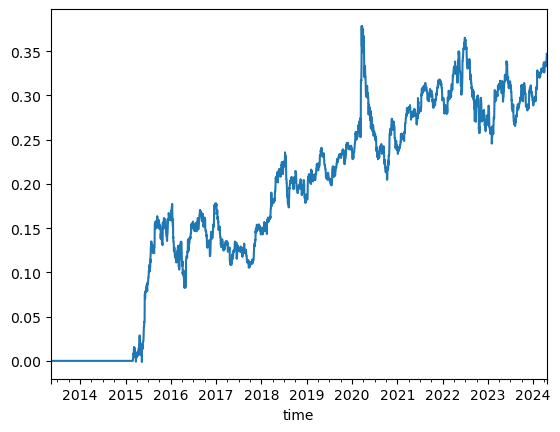

In [ ]:
pnl.cumsum().ffill().plot()

In [ ]:
pred_ds = pd.DataFrame()
for i in range(12):
  p = pd.concat([label,bisignals_df.loc[:,rand_port[i]]],axis=1).dropna()
  lookback = 9600

  # create rolling datasets for each day
  rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
  # random forest prediction
  #pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
  size = 70000
  pred = [get_pred(dataset) for dataset in rolling[:size]]
  pred_d = pd.Series(pred,p.index[lookback:lookback+size])
  pred_ds[i] = pred_d

<Axes: >

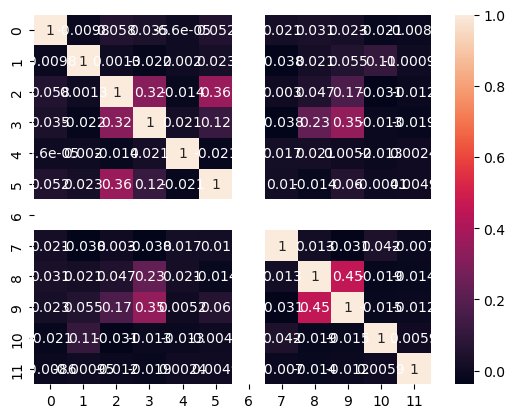

In [ ]:
import seaborn as sns
sns.heatmap(pred_ds.corr(),annot=True)

In [ ]:
for k,p in port.items():
  print(f'{k}:{p}') 

0:['KurtReversal_12_0.85', 'SkewPremium_12_0.95', 'KurtReversal_12_0.95', 'SkewPremium_12_0.99', 'KurtReversal_12_0.99', 'SkewPremium_24_0.99', 'KurtReversal_24_0.99', 'KurtReversal_48_0.99']
1:['SkewPremium_96_0.85', 'SkewPremium_96_0.95', 'SkewPremium_192_0.85', 'SkewPremium_192_0.95', 'SkewPremium_192_0.99', 'SkewPremium_384_0.85', 'SkewPremium_384_0.95', 'SkewPremium_384_0.99']
2:['ChannelBreakout_12_0.85', 'ChannelBreakout_12_0.95', 'ChannelBreakout_12_0.99', 'ChannelBreakout_24_0.85', 'ChannelBreakout_24_0.95', 'ChannelBreakout_24_0.99', 'ChannelBreakout_48_0.85', 'ChannelBreakout_48_0.95', 'ChannelBreakout_48_0.99', 'ChannelBreakout_96_0.85', 'ChannelBreakout_96_0.95', 'ChannelBreakout_96_0.99', 'ChannelBreakout_192_0.85', 'ChannelBreakout_192_0.95', 'ChannelBreakout_192_0.99', 'ChannelBreakout_384_0.85', 'ChannelBreakout_384_0.95', 'ChannelBreakout_384_0.99']
3:['EWMAC_48_1', 'EWMAC_48_2', 'EWMAC_48_3', 'EWMAC_96_1', 'EWMAC_96_2', 'EWMAC_96_3']
4:['NDayMomentum_12_1', 'NDayMome

In [ ]:
for k,p in rand_port.items():
  print(f'{k}:{p}') 

0:['KurtReversal_12_0.85', 'KurtReversal_12_0.95', 'SkewPremium_12_0.99', 'KurtReversal_12_0.99', 'KurtReversal_24_0.85', 'KurtReversal_24_0.95', 'SkewPremium_24_0.99', 'KurtReversal_24_0.99', 'KurtReversal_48_0.85', 'KurtReversal_48_0.95', 'KurtReversal_48_0.99', 'KurtReversal_96_0.85', 'KurtReversal_96_0.95', 'KurtReversal_96_0.99', 'KurtReversal_192_0.85', 'KurtReversal_192_0.95', 'KurtReversal_192_0.99', 'KurtReversal_384_0.85', 'KurtReversal_384_0.95', 'KurtReversal_384_0.99']
1:['EWMAC_12_1', 'EWMAC_12_2', 'EWMAC_12_3', 'BollingerBand_96_1', 'BollingerBand_96_2', 'BollingerBand_96_3', 'BollingerBand_192_1', 'BollingerBand_192_2', 'BollingerBand_192_3']
2:['NDayMomentum_48_1', 'NDayMomentum_48_2', 'NDayMomentum_48_3', 'ChannelBreakout_96_0.85', 'ChannelBreakout_96_0.95', 'ChannelBreakout_96_0.99', 'NDayMomentum_96_1', 'NDayMomentum_96_2', 'NDayMomentum_96_3', 'ChannelBreakout_192_0.85', 'ChannelBreakout_192_0.95', 'ChannelBreakout_192_0.99']
3:['EWMAC_96_1', 'EWMAC_96_2', 'EWMAC_9

In [ ]:
pred_ds.index = pd.DatetimeIndex(pred_ds.index)

<Axes: xlabel='Datetime'>

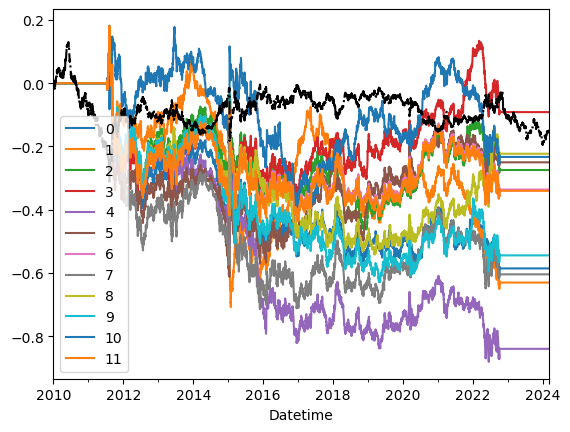

In [ ]:
(pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum().cumsum().plot()
data.Close.diff().shift(-1).resample('D').sum().cumsum().plot(color='black',linestyle='-.')

In [ ]:
pnl = (pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum()

In [ ]:
sr(pnl.mean(axis=1))

-0.8214458938203274

In [ ]:
sr((bisignals_df.mul(data.Close.diff().shift(-1),axis=0) - (bisignals_df.diff().abs() * 0.00001)).resample('D').sum().mean(axis=1))

-1.5130571133342507

In [ ]:
(pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum().apply(sr)

0    -0.982575
1    -1.158367
2    -0.474499
3    -0.161862
4    -1.348713
5    -0.435245
6    -0.562507
7    -1.015578
8    -0.380203
9    -1.041062
10   -0.413015
11   -0.569362
dtype: float64

In [ ]:
p = pd.concat([label,bisignals_df.fillna(0)],axis=1).dropna()
lookback = 9600

# create rolling datasets for each day
rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
# random forest prediction
#pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
size = 70000
pred = [get_pred(dataset) for dataset in rolling[:size]]
pred_d = pd.Series(pred,p.index[lookback:lookback+size])

In [ ]:
data.Close.diff().shift(-1).index

Index(['2010-01-01 00:00:00', '2010-01-01 01:00:00', '2010-01-01 02:00:00',
       '2010-01-01 03:00:00', '2010-01-01 04:00:00', '2010-01-01 05:00:00',
       '2010-01-01 06:00:00', '2010-01-01 07:00:00', '2010-01-01 08:00:00',
       '2010-01-01 09:00:00',
       ...
       '2024-03-08 15:00:00', '2024-03-08 16:00:00', '2024-03-08 17:00:00',
       '2024-03-08 18:00:00', '2024-03-08 19:00:00', '2024-03-08 20:00:00',
       '2024-03-08 21:00:00', '2024-03-10 21:00:00', '2024-03-10 22:00:00',
       '2024-03-10 23:00:00'],
      dtype='object', name='Datetime', length=88486)

<Axes: xlabel='Datetime'>

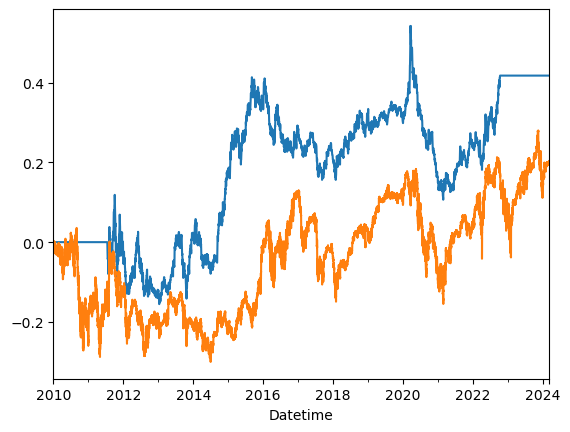

In [ ]:
pnl.mean(axis=1).cumsum().plot()
(pnls_df.mean(axis=1)*10).cumsum().plot()

<Axes: xlabel='Datetime'>

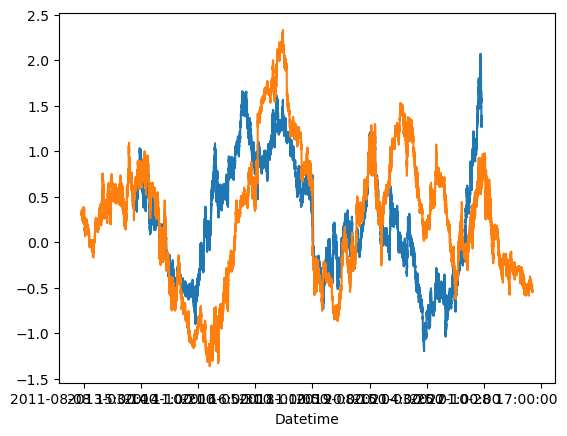

In [ ]:
pred_ds.mul(data.Close.diff().shift(-1),axis=0).mean(axis=1).rolling(9600).apply(sr).plot()
pnls_df.mean(axis=1).rolling(9600).apply(sr).plot()

In [ ]:
for i in range(12):
  p = pd.concat([label,bisignals_df.loc[:,port[i]]],axis=1).dropna()
  lookback = 9600

  # create rolling datasets for each day
  rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
  # random forest prediction
  #pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
  size = 70000
  pred = [get_pred(dataset,lookback) for dataset in rolling[:size]]
  pred_d = pd.Series(pred,p.index[lookback:lookback+size])
  pred_ds[i] = pred_d

<Axes: xlabel='Datetime'>

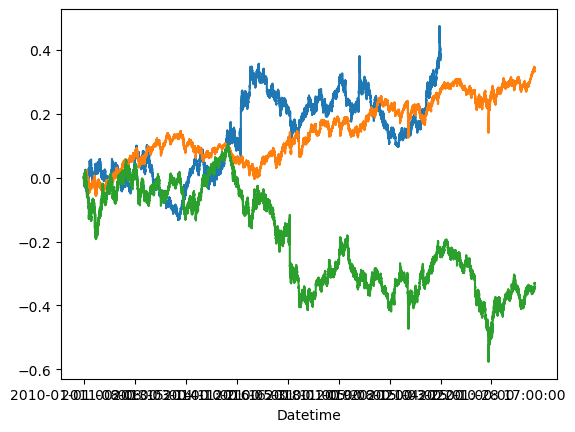

In [ ]:
(pred_d/2 * data.Close.diff().shift(-1)).dropna().cumsum().plot()
(pnls_df.loc[:,port[9]].mean(axis=1)).cumsum().plot()
data.Close.diff().shift(-1).cumsum().plot()

In [ ]:
vf = np.vectorize(lambda x: print(x))
vf(rolling[:1])

In [ ]:
vget_pred = np.vectorize(get_pred)
vget_pred(rolling[:2])

In [ ]:
r1[:,-10:]

In [ ]:
p.iloc[2391:2401]

# AggClust

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model,ax):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,ax=ax)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(pnls_df.corr())

In [ ]:
model.n_clusters_

In [ ]:
fig,ax = plt.subplots(figsize=(40,16))
plot_dendrogram(model,ax=ax)

# HRP

In [ ]:
from pypfopt.hierarchical_portfolio import HRPOpt

In [ ]:
hrp = HRPOpt(pnls_df)

In [ ]:
hrp.optimize()

In [ ]:
hrp.portfolio_performance(risk_free_rate=0,frequency=252*24)